# Data Cleaning:- 
## To find all missing values and filling those missing values
### Methods- Forward Fill, Backward Fill, Interpolation and Mean Value

## <font color='green'>Loading Dataset</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data =pd.read_csv(r'C:\Users\IV-DC.csv')
print (data)

  DC Input Current [A] DC Input Voltage [V]
0                 0.86                722.3
1                 1.03                726.7
2                 1.38                741.5
3                  NaN                  NaN
4                 2.01                759.5
5                 2.27                786.4
6                 2.85                779.2
7                  N/a                776.6
8                 3.82                780.6
9                 4.33                   na


## <font color='green'>Finding Missing Values</font>

In [3]:
data.isnull().sum()

DC Input Current [A]    1
DC Input Voltage [V]    1
dtype: int64

Here we have NaN, N/a and na values. But if we check Null values it will not show all missing values. It showing only 4th row misisng value.
So, we will define missing values list during reading the csv file.

In [4]:
missingvalues=["N/a", "na", np.nan]
df =pd.read_csv(r'C:\Users\IV-DC.csv', na_values=missingvalues)

In [5]:
print(df)

   DC Input Current [A]  DC Input Voltage [V]
0                  0.86                 722.3
1                  1.03                 726.7
2                  1.38                 741.5
3                   NaN                   NaN
4                  2.01                 759.5
5                  2.27                 786.4
6                  2.85                 779.2
7                   NaN                 776.6
8                  3.82                 780.6
9                  4.33                   NaN


In [6]:
df.isnull().sum()

DC Input Current [A]    2
DC Input Voltage [V]    2
dtype: int64

Here we get all missing values.

In [7]:
df.isnull().any()
#True means having NA values and False means no any missing values

DC Input Current [A]    True
DC Input Voltage [V]    True
dtype: bool

## <font color='green'>Visualizing Missing Values</font>

<AxesSubplot:>

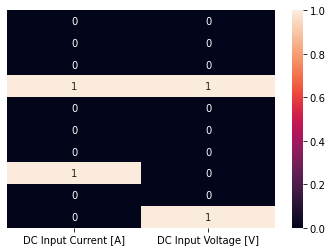

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

Here we can see all the NA values.

## <font color='green'>Removing Missing Values</font>

In [9]:
df_mv = df
print(df_mv)

   DC Input Current [A]  DC Input Voltage [V]
0                  0.86                 722.3
1                  1.03                 726.7
2                  1.38                 741.5
3                   NaN                   NaN
4                  2.01                 759.5
5                  2.27                 786.4
6                  2.85                 779.2
7                   NaN                 776.6
8                  3.82                 780.6
9                  4.33                   NaN


### <font color='blue'>Method 1: Removing all rows which are having missing values.</font>

In [10]:
df_mv.dropna()

,DC Input Current [A],DC Input Voltage [V]
0,0.86,722.3
1,1.03,726.7
2,1.38,741.5
4,2.01,759.5
5,2.27,786.4
6,2.85,779.2
8,3.82,780.6


### <font color='blue'>Method 2: Removing only that rows where entire columns have missing values.</font>

In [11]:
df_mv.dropna(how="all")

,DC Input Current [A],DC Input Voltage [V]
0,0.86,722.3
1,1.03,726.7
2,1.38,741.5
4,2.01,759.5
5,2.27,786.4
6,2.85,779.2
7,NaN,776.6
8,3.82,780.6
9,4.33,NaN


Now we can see only 4th row is removed. Here, both methods (removing missing values) are explained as an example, I have not removed any data for further explanation.

## <font color='green'>Filling Missing Values</font>

In [12]:
df #original dataset

,DC Input Current [A],DC Input Voltage [V]
0,0.86,722.3
1,1.03,726.7
2,1.38,741.5
3,NaN,NaN
4,2.01,759.5
5,2.27,786.4
6,2.85,779.2
7,NaN,776.6
8,3.82,780.6
9,4.33,NaN


### <font color='blue'>Method 1: Filling Missing Values with Forward Fill</font>

Pandas dataframe.ffill() function is used to fill the missing value in the dataset. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [13]:
df1 = df.fillna(method='ffill')
print(df1)

   DC Input Current [A]  DC Input Voltage [V]
0                  0.86                 722.3
1                  1.03                 726.7
2                  1.38                 741.5
3                  1.38                 741.5
4                  2.01                 759.5
5                  2.27                 786.4
6                  2.85                 779.2
7                  2.85                 776.6
8                  3.82                 780.6
9                  4.33                 780.6


### <font color='blue'>Method 2: Filling Missing Values with Backward Fill</font>

Pandas dataframe.bfill() is used to backward fill the missing values in the dataset. It will backward fill the NaN values that are present in the pandas dataframe.

In [14]:
df2 = df.fillna(method='bfill')
print(df2)

   DC Input Current [A]  DC Input Voltage [V]
0                  0.86                 722.3
1                  1.03                 726.7
2                  1.38                 741.5
3                  2.01                 759.5
4                  2.01                 759.5
5                  2.27                 786.4
6                  2.85                 779.2
7                  3.82                 776.6
8                  3.82                 780.6
9                  4.33                   NaN


### <font color='blue'>Method 3: Filling Missing Values with Interpolation</font>

Interpolation method is used to find missing value with help of its neighbors. Interpolation is mostly used while working with time-series data because in time-series data we like to fill missing values with previous one or two values.

In [15]:
df3 = df.interpolate(method='linear') #Calculation example for 4th row, (1.380+2.010)/2=1.695
print(df3)

   DC Input Current [A]  DC Input Voltage [V]
0                 0.860                 722.3
1                 1.030                 726.7
2                 1.380                 741.5
3                 1.695                 750.5
4                 2.010                 759.5
5                 2.270                 786.4
6                 2.850                 779.2
7                 3.335                 776.6
8                 3.820                 780.6
9                 4.330                 780.6


### <font color='blue'>Method 4: Filling Missing Values with Mean Value</font>

In [16]:
df.describe()

,DC Input Current [A],DC Input Voltage [V]
count,8.000000,8.00000
mean,2.318750,759.10000
std,1.273291,25.72303
min,0.860000,722.30000
25%,1.292500,737.80000
50%,2.140000,768.05000
75%,3.092500,779.55000
max,4.330000,786.40000


In [17]:
df4 = df.copy()

In [18]:
#Filling Missing Values in DC Input Current [A] Column
mean_value1=df4['DC Input Current [A]'].mean() #Finding the mean of the column having NaN
df4['DC Input Current [A]'] = df4['DC Input Current [A]'].fillna(value=mean_value1) #Replace NaNs with mean of values in the same column
print(df4)

   DC Input Current [A]  DC Input Voltage [V]
0               0.86000                 722.3
1               1.03000                 726.7
2               1.38000                 741.5
3               2.31875                   NaN
4               2.01000                 759.5
5               2.27000                 786.4
6               2.85000                 779.2
7               2.31875                 776.6
8               3.82000                 780.6
9               4.33000                   NaN


In [19]:
#Filling Missing Values in DC Input Voltage [V] Column
mean_value2=df4['DC Input Voltage [V]'].mean()
df4['DC Input Voltage [V]'] = df4['DC Input Voltage [V]'].fillna(value=mean_value2)
print(df4)

   DC Input Current [A]  DC Input Voltage [V]
0               0.86000                 722.3
1               1.03000                 726.7
2               1.38000                 741.5
3               2.31875                 759.1
4               2.01000                 759.5
5               2.27000                 786.4
6               2.85000                 779.2
7               2.31875                 776.6
8               3.82000                 780.6
9               4.33000                 759.1


##### Here, filling missing values with "Mean Value" and "Interpolation" method can be the best method.

In [20]:
#df4.to_csv('IV_missing_value.csv') #to save the output in csv file